In [1]:
# Description: Use the relative Strength Index (RSI) and Python to determine if a stock is being over bought or over sold.

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')


Bad key "text.kerning_factor" on line 4 in
C:\Users\joon7\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Store the data into a df
df = web.DataReader('005930.KS', data_source='yahoo', start='2020-06-01', end='2022-03-02')
# Take a look at the data
df = df.set_index(pd.DatetimeIndex(df.index.values))
# Show the data
# df.info()
df

,High,Low,Open,Close,Volume,Adj Close
2020-06-01,51200.0,50600.0,50800.0,51200.0,16949183.0,48423.632812
2020-06-02,51500.0,50800.0,51000.0,51400.0,14247933.0,48612.785156
2020-06-03,55000.0,51700.0,51800.0,54500.0,49257814.0,51544.687500
2020-06-04,57000.0,54600.0,55800.0,54600.0,40220334.0,51639.261719
2020-06-05,55900.0,54000.0,54400.0,55500.0,22743629.0,52490.457031
...,...,...,...,...,...,...
2022-02-23,74300.0,74300.0,74300.0,74300.0,0.0,74300.000000
2022-02-24,72300.0,71300.0,72300.0,71500.0,15759283.0,71500.000000
2022-02-25,72600.0,71900.0,72100.0,71900.0,13168484.0,71900.000000
2022-02-28,71900.0,71900.0,71900.0,71900.0,0.0,71900.000000


Text(0, 0.5, 'Close Price USD ($)')

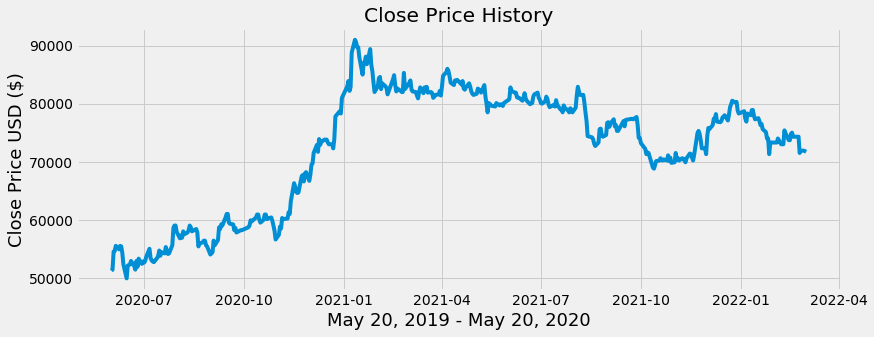

In [4]:
# Visually show the price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, df['Close'], label = 'Close')
plt.title('Close Price History')
plt.xlabel('May 20, 2019 - May 20, 2020', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)

In [5]:
# Prepare the data to calculate the RSI

# Get the difference in price
delta = df['Close'].diff(1)
delta

2020-06-01       NaN
2020-06-02     200.0
2020-06-03    3100.0
2020-06-04     100.0
2020-06-05     900.0
               ...  
2022-02-23       0.0
2022-02-24   -2800.0
2022-02-25     400.0
2022-02-28       0.0
2022-03-02    -200.0
Name: Close, Length: 433, dtype: float64

In [6]:
# Get rid of NaN
delta = delta.dropna()
delta

2020-06-02     200.0
2020-06-03    3100.0
2020-06-04     100.0
2020-06-05     900.0
2020-06-08    -600.0
               ...  
2022-02-23       0.0
2022-02-24   -2800.0
2022-02-25     400.0
2022-02-28       0.0
2022-03-02    -200.0
Name: Close, Length: 432, dtype: float64

In [7]:
# Get the positive gains (up) and the negative gains (down)
up = delta.copy()
down = delta.copy()

up[up < 0] = 0
down[down > 0] = 0

In [8]:
# Get the time period
period = 14
# Calculate the average gain and the average loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [9]:
# Calculate the RSI

# Calculate the Relative Strength
RS = AVG_Gain / AVG_Loss
# Calculate the Relative Strength Index (RSI)
RSI = 100.0 - (100.0 / (1.0 + RS))

# if AVG_Gain is more than AVG_Loss then RSI decreses
RSI = RSI.dropna()
RSI

2020-06-19    56.028369
2020-06-22    52.027027
2020-06-23    37.398374
2020-06-24    43.795620
2020-06-25    36.956522
                ...    
2022-02-23    56.410256
2022-02-24    37.373737
2022-02-25    44.086022
2022-02-28    44.086022
2022-03-02    43.157895
Name: Close, Length: 419, dtype: float64

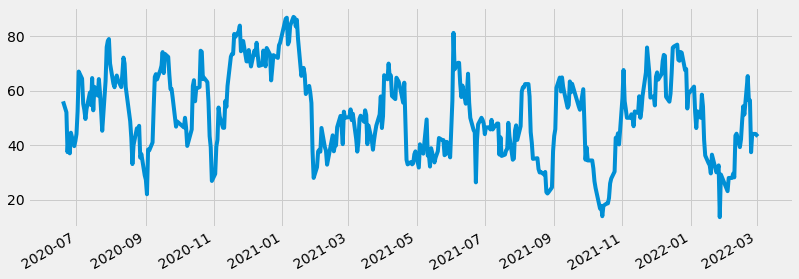

In [10]:
# Show the RSI Visually
plt.figure(figsize = (12.2, 4.5))
RSI.plot()
plt.show()

In [11]:
# Put it all together

new_df = pd.DataFrame()
new_df['Close'] = df['Close']
new_df['RSI'] = RSI
new_df = new_df.dropna()
new_df

,Close,RSI
2020-06-19,52900.0,56.028369
2020-06-22,52000.0,52.027027
2020-06-23,51400.0,37.398374
2020-06-24,52900.0,43.795620
2020-06-25,51900.0,36.956522
...,...,...
2022-02-23,74300.0,56.410256
2022-02-24,71500.0,37.373737
2022-02-25,71900.0,44.086022
2022-02-28,71900.0,44.086022


In [12]:
low1 = 10
low2 = 20
low3 = 30
high1 = 90
high2 = 80
high3 = 55

# Create a function to get the buy and sell signals
def get_signal(data, high, low):
    buy_signal = []
    sell_signal = []
    
    for i in range(len(data['RSI'])):
        if data['RSI'][i] > high:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['RSI'][i] < low:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)   
        else:
            buy_signal.append(np.nan)   
            sell_signal.append(np.nan)   
    return (buy_signal, sell_signal)

In [13]:
# Add new columns (Buy & Sell)
new_df['Buy1'] = get_signal(new_df, high1, low1)[0]
new_df['Sell1'] = get_signal(new_df, high1, low1)[1]
new_df['Buy2'] = get_signal(new_df, high2, low2)[0]
new_df['Sell2'] = get_signal(new_df, high2, low2)[1]
new_df['Buy3'] = get_signal(new_df, high3, low3)[0]
new_df['Sell3'] = get_signal(new_df, high3, low3)[1]
# Show the data

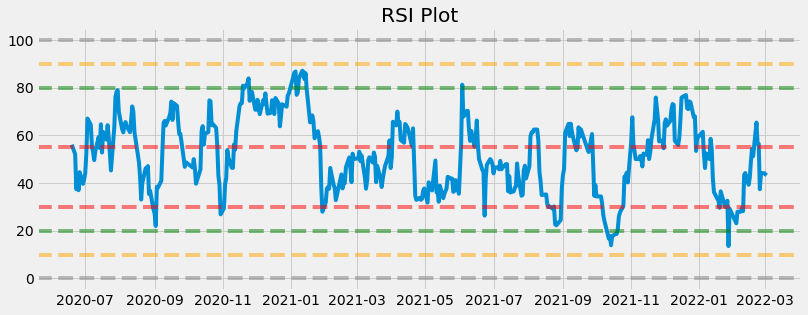

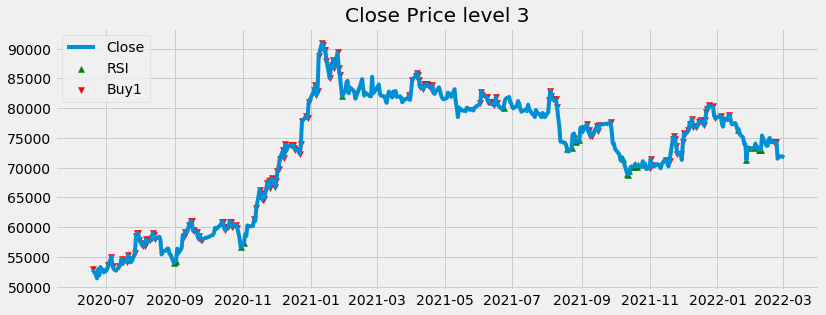

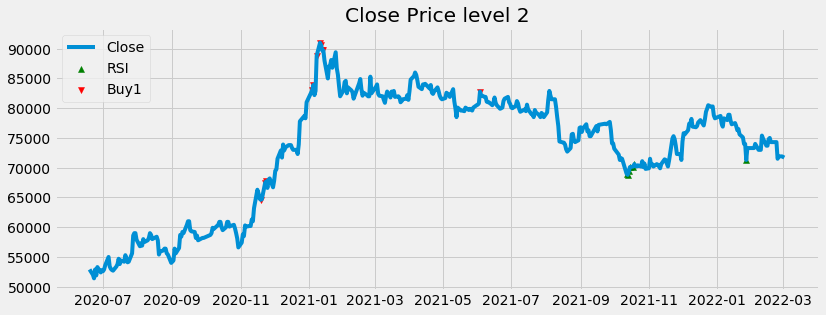

In [19]:
# Visually show the adjusted close price and RSI

# Plot the corresponding RSI values and the significant levels
plt.figure(figsize= (12.2, 4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle = '--', alpha = 0.5, color = 'gray')
plt.axhline(low1, linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(low2, linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(low3, linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(high3, linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(high2, linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(high1, linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(100, linestyle = '--', alpha = 0.5, color = 'gray')

# Plot the adjusted close price
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df.index, new_df['Close'])
plt.scatter(new_df.index, new_df['Buy3'], color = 'green', label='Buy Signal', marker = '^', alpha=1)
plt.scatter(new_df.index, new_df['Sell3'], color = 'red', label='Sell Signal', marker = 'v', alpha=1)
plt.title('Close Price level 3')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()

plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df.index, new_df['Close'])
plt.scatter(new_df.index, new_df['Buy2'], color = 'green', label='Buy Signal', marker = '^', alpha=1)
plt.scatter(new_df.index, new_df['Sell2'], color = 'red', label='Sell Signal', marker = 'v', alpha=1)
plt.title('Close Price level 2')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()

#plt.figure(figsize=(12.2, 4.5))
#plt.plot(new_df.index, new_df['Close'])
#plt.scatter(new_df.index, new_df['Buy1'], color = 'green', label='Buy Signal', marker = '^', alpha=1)
#plt.scatter(new_df.index, new_df['Sell1'], color = 'red', label='Sell Signal', marker = 'v', alpha=1)
#plt.title('Close Price level 1')
#plt.title('Close Price History')
#plt.legend(new_df.columns.values, loc = 'upper left')
#plt.show()


#when RSI vlaue is high, it is overbought, if RSI value is low it is over sold